# DATA CHALLENGE : HOUSE  PRICE FORCASTING

In [ ]:
!python -m pip install -r requirements.txt

In [115]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from metrics.custom_metric_ilb import custom_metric_function

In [116]:
pd.options.display.max_rows=28
pd.options.display.max_columns=28

## 1. DATA PREPROCESSING :

In [117]:
filepath='data/'
X_train=pd.read_csv(filepath +'X_train_J01Z4CN.csv') 
Y_train=pd.read_csv(filepath + 'y_train_OXxrJt1.csv')
Y_test=pd.read_csv(filepath + 'y_random_MhJDhKK.csv')
X_test=pd.read_csv(filepath + 'X_test_BEhvxAN.csv')


In [118]:
X_train.head()

,id_annonce,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,energy_performance_category,ghg_value,ghg_category,exposition,nb_rooms,nb_bedrooms,nb_bathrooms,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
0,35996577,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,35811033,appartement,45.695757,4.895610,venissieux,69200,90.0,3.0,NaN,223.0,D,52.0,E,NaN,5.0,4.0,NaN,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35731841,maison,47.966791,-1.220451,moutiers,35130,61.0,NaN,370.0,NaN,NaN,NaN,NaN,Sud,2.0,1.0,NaN,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35886765,maison,47.289292,-1.878805,cordemais,44360,142.0,NaN,764.0,217.0,D,44.0,E,NaN,4.0,3.0,NaN,0.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,35781137,appartement,45.718992,4.844234,lyon-7eme,69007,88.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,1.0,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
Y_train.head()

,id_annonce,price
0,35996577,355000.0
1,35811033,190000.0
2,35731841,39000.0
3,35886765,299000.0
4,35781137,478000.0


In [120]:
X_train.describe()

,id_annonce,approximate_latitude,approximate_longitude,postal_code,size,floor,land_size,energy_performance_value,ghg_value,nb_rooms,nb_bedrooms,nb_bathrooms,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
count,3.736800e+04,37368.000000,37368.000000,37368.000000,36856.000000,9743.000000,1.558100e+04,19068.000000,18530.000000,35802.000000,34635.000000,24095.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000,37368.000000
mean,3.569033e+07,46.546155,2.619087,53598.371655,1088.831615,3.479524,3.995665e+03,205.385148,31.845548,4.245405,2.864877,0.920730,0.293486,0.179699,7.979153,0.148282,0.309596,0.200145,0.053870,0.039847,0.003827,0.000241
std,1.468073e+06,2.356581,2.597060,28807.220527,5555.320867,6.725577,5.441595e+04,790.501769,310.576209,2.987782,2.156517,0.270778,0.455365,0.383942,4.646145,0.355384,0.462333,0.400114,0.225763,0.195602,0.061744,0.015518
min,6.774630e+06,41.374436,-4.733545,1000.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.580825e+07,43.921547,1.096014,30150.000000,74.000000,1.000000,3.620000e+02,125.000000,8.000000,3.000000,2.000000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.587096e+07,46.939440,2.380793,59000.000000,115.000000,2.000000,7.950000e+02,180.000000,16.000000,4.000000,3.000000,1.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.601119e+07,48.841511,4.624248,78210.000000,235.250000,4.000000,1.841000e+03,239.000000,36.000000,5.000000,4.000000,1.000000,1.000000,0.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.609881e+07,51.075892,9.503198,95880.000000,411311.000000,55.000000,6.203700e+06,100000.000000,17024.000000,130.000000,118.000000,3.000000,1.000000,1.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [121]:
L=["property_type","city","energy_performance_category","ghg_category","exposition"]
for x in L:
    X_train[x]=X_train[x].astype("category")
    X_test[x]=X_test[x].astype("category")


In [122]:
X_train.isna().sum()/len(X_train.index)*100


id_annonce                      0.000000
property_type                   0.000000
approximate_latitude            0.000000
approximate_longitude           0.000000
city                            0.000000
postal_code                     0.000000
size                            1.370156
floor                          73.926889
land_size                      58.303896
energy_performance_value       48.972383
energy_performance_category    48.972383
ghg_value                      50.412117
ghg_category                   50.412117
exposition                     75.663669
nb_rooms                        4.190751
nb_bedrooms                     7.313744
nb_bathrooms                   35.519696
nb_parking_places               0.000000
nb_boxes                        0.000000
nb_photos                       0.000000
has_a_balcony                   0.000000
nb_terraces                     0.000000
has_a_cellar                    0.000000
has_a_garage                    0.000000
has_air_conditio

<AxesSubplot:>

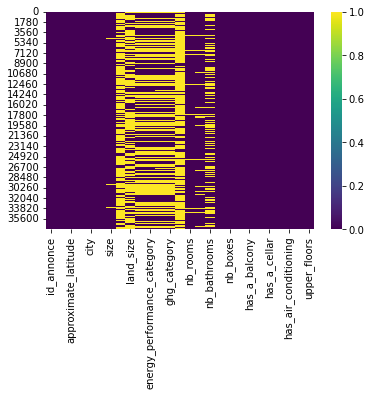

In [123]:
sb.heatmap(X_train.isnull(),cmap='viridis')

## 1. Cleaning the data
### a. DataTypes :
First let's make sure that all the data has the proper type (especially that categorical data isn't set as numerical)

In [124]:
# Numerical type Columns
X_train.select_dtypes(np.number)


,id_annonce,approximate_latitude,approximate_longitude,postal_code,size,floor,land_size,energy_performance_value,ghg_value,nb_rooms,nb_bedrooms,nb_bathrooms,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
0,35996577,43.643880,7.117183,6270,63.0,NaN,NaN,NaN,NaN,3.0,2.0,NaN,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,35811033,45.695757,4.895610,69200,90.0,3.0,NaN,223.0,52.0,5.0,4.0,NaN,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35731841,47.966791,-1.220451,35130,61.0,NaN,370.0,NaN,NaN,2.0,1.0,NaN,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35886765,47.289292,-1.878805,44360,142.0,NaN,764.0,217.0,44.0,4.0,3.0,NaN,0.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,35781137,45.718992,4.844234,69007,88.0,3.0,NaN,NaN,NaN,4.0,3.0,1.0,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37363,35881571,43.480292,-1.484324,64100,2995.0,NaN,NaN,255.0,59.0,1.0,NaN,1.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37364,35890109,48.861391,2.401158,75020,36.0,4.0,NaN,229.0,53.0,2.0,1.0,NaN,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37365,36010245,44.397837,-1.164312,40600,99.0,2.0,NaN,NaN,NaN,4.0,3.0,NaN,1.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
37366,35864579,48.864204,2.808693,77700,9281.0,NaN,NaN,NaN,NaN,5.0,4.0,NaN,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
X_train.select_dtypes(np.number).columns

Index(['id_annonce', 'approximate_latitude', 'approximate_longitude',
       'postal_code', 'size', 'floor', 'land_size', 'energy_performance_value',
       'ghg_value', 'nb_rooms', 'nb_bedrooms', 'nb_bathrooms',
       'nb_parking_places', 'nb_boxes', 'nb_photos', 'has_a_balcony',
       'nb_terraces', 'has_a_cellar', 'has_a_garage', 'has_air_conditioning',
       'last_floor', 'upper_floors'],
      dtype='object')

In [31]:
X_train.select_dtypes(object)

,property_type,city,energy_performance_category,ghg_category,exposition
0,appartement,villeneuve-loubet,NaN,NaN,NaN
1,appartement,venissieux,D,E,NaN
2,maison,moutiers,NaN,NaN,Sud
3,maison,cordemais,D,E,NaN
4,appartement,lyon-7eme,NaN,NaN,NaN
...,...,...,...,...,...
37363,appartement,bayonne,E,F,NaN
37364,appartement,paris-20eme,D,E,Sud
37365,appartement,biscarrosse,NaN,NaN,NaN
37366,duplex,magny-le-hongre,NaN,NaN,NaN


In [114]:
X_train.select_dtypes(object).columns

Index(['property_type', 'city', 'energy_performance_category', 'ghg_category',
       'exposition'],
      dtype='object')

### b. Dealing with NaN Values :

Missing values :

```
size                             512 # Numerical
floor                          27625 # Numerical
land_size                      21787 # Numerical
energy_performance_value       18300 # Numerical
energy_performance_category    18300 # Categorical
ghg_value                      18838 # Numerical
ghg_category                   18838 # Categorical
exposition                     28274 # Categorical
nb_rooms                        1566 # Numerical
nb_bedrooms                     2733 # Numerical
nb_bathrooms                   13273 # Numerical
```

- For houses we'll set the the floor value at 0
- For appartements we'll set the landsize value at 0

Based on the missing values heatmap we'll drop : 
- Energy_performance_value
- Energy_category
- GHG_value
- GHG_category
- Exposition


In [127]:
X_train=X_train.drop(columns="exposition")

In [133]:
from sklearn.neighbors import KNeighborsRegressor

#KNN imputation / Try and expirement different imputations
def knn_impute(df0, column):
    """ 
    """
    # Creating a copy of the input dataframe
    df = df0.copy()

    # numeric_df : subset of df composed only of numerical data type colums
    numeric_df = df.select_dtypes(np.number)

    # full columns : columns that have no missing data
    full_columns=numeric_df.loc[:,numeric_df.isna().sum()==0].columns

    # knn_x_train : training data for the missing values
    knn_x_train = numeric_df.loc[numeric_df[column].isna()==False, full_columns]

    # knn_y_train: target data for the missing valies 
    knn_y_train= numeric_df.loc[numeric_df[column].isna()==False, column]

    # knn_x_test : the data with missing values for the target column
    knn_x_test = numeric_df.loc[numeric_df[column].isna()==True, full_columns]

    # Creating the KNeighbors Regress
    knn=KNeighborsRegressor()

    # Fitting the model
    knn.fit(knn_x_train, knn_y_train)

    y_pred=knn.predict(knn_x_test)

    df.loc[df[column].isna()==True, column]=y_pred


    return df

In [134]:
def knn_impute_all(df, list_columns):
    for column in list_columns:
        df=knn_impute(df,column)
    return df

In [132]:
list_columns = ["size", "land_size","energy_performance_value","ghg_value", "nb_rooms","nb_bathrooms", "nb_bedrooms"]
test = knn_impute_all(X_train, list_columns=list_columns)
test.isna().sum()

id_annonce                         0
property_type                      0
approximate_latitude               0
approximate_longitude              0
city                               0
postal_code                        0
size                               0
floor                          27625
land_size                          0
energy_performance_value           0
energy_performance_category    18300
ghg_value                          0
ghg_category                   18838
nb_rooms                           0
nb_bedrooms                        0
nb_bathrooms                       0
nb_parking_places                  0
nb_boxes                           0
nb_photos                          0
has_a_balcony                      0
nb_terraces                        0
has_a_cellar                       0
has_a_garage                       0
has_air_conditioning               0
last_floor                         0
upper_floors                       0
dtype: int64

In [136]:
test.loc[(test['property_type']!="appartement"), 'floor'] = 0


In [137]:
test.isna().sum()

id_annonce                         0
property_type                      0
approximate_latitude               0
approximate_longitude              0
city                               0
postal_code                        0
size                               0
floor                           6135
land_size                          0
energy_performance_value           0
energy_performance_category    18300
ghg_value                          0
ghg_category                   18838
nb_rooms                           0
nb_bedrooms                        0
nb_bathrooms                       0
nb_parking_places                  0
nb_boxes                           0
nb_photos                          0
has_a_balcony                      0
nb_terraces                        0
has_a_cellar                       0
has_a_garage                       0
has_air_conditioning               0
last_floor                         0
upper_floors                       0
dtype: int64

array([[<AxesSubplot:title={'center':'id_annonce'}>,
        <AxesSubplot:title={'center':'approximate_latitude'}>,
        <AxesSubplot:title={'center':'approximate_longitude'}>,
        <AxesSubplot:title={'center':'postal_code'}>,
        <AxesSubplot:title={'center':'size'}>],
       [<AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'land_size'}>,
        <AxesSubplot:title={'center':'energy_performance_value'}>,
        <AxesSubplot:title={'center':'ghg_value'}>,
        <AxesSubplot:title={'center':'nb_rooms'}>],
       [<AxesSubplot:title={'center':'nb_bedrooms'}>,
        <AxesSubplot:title={'center':'nb_bathrooms'}>,
        <AxesSubplot:title={'center':'nb_parking_places'}>,
        <AxesSubplot:title={'center':'nb_boxes'}>,
        <AxesSubplot:title={'center':'nb_photos'}>],
       [<AxesSubplot:title={'center':'has_a_balcony'}>,
        <AxesSubplot:title={'center':'nb_terraces'}>,
        <AxesSubplot:title={'center':'has_a_cellar'}>,
        <

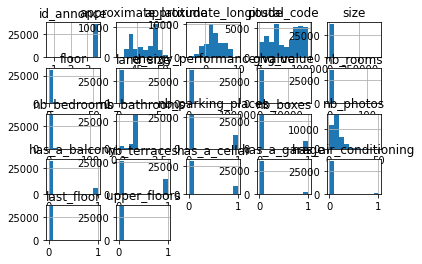

In [138]:
test.loc[,"property_type"].hist()

## 2. Feature Engineering 


## 3. Feature Transformations 


## 4. Encoding


## 5. Scaling


## 6. Target Transformation


## 7. Model Selection


## 8. Hyperparameter Optimization


## 9. Ensembling

## 9. Feauture selection
